<a href="https://colab.research.google.com/github/syarifahrmdhn/predicting-fake-news/blob/main/Predicting_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INPUT DATA LATIH + DATA UJI + GABUNGIN

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import io
latih = pd.read_excel(io.BytesIO(uploaded['Data Latih BDC.xlsx']),usecols=['label','judul','narasi'],encoding='ISO-8859-1')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
!pip install sastrawi

     |████████████████████████████████| 215kB 4.8MB/s 


In [ ]:
gabung = pd.concat([latih,uji],axis=0).reset_index(drop=True)
print('Size of gabung data', gabung.shape)

Size of gabung data (4701, 3)


In [ ]:
latih['text'] = latih['judul'] + " " + latih['narasi']
latih = latih.drop(columns = ['judul', 'narasi'])
# df = df.loc[~df['text'].isna()]

In [ ]:
latih.head()

,label,text
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1,Instruksi Gubernur Jateng tentang penilangan ...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin K...


In [ ]:
latih[gabung['label'].isnull()]

,label,text
4231,NaN,Narasi Tito Karnavian Berideologi Komunis Kare...
4232,NaN,Anies: Seberat beratnya Pekerjaan Akan terasa ...
4233,NaN,Hindu di india Melemparkan Patung Buatan Merek...
4234,NaN,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...
4235,NaN,Permohonan Kelonggaran Angsuran ke OJK Untuk s...
...,...,...
4696,NaN,"Dijemput oleh Tim Medis, Kakak Beradik Usia 8 ..."
4697,NaN,": Pertanda Alam, Kera Putih Mulai Turun Dari G..."
4698,NaN,Pasar Wameo dan Karya Nugraha di Tutup selama ...
4699,NaN,Klarifikasi KPK Terkait Foto Setya Novanto Tan...


In [ ]:
gabung['text'][0]

'Pemakaian Masker Menyebabkan Penyakit Legionnaires A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔'

In [ ]:
latih.iloc[:,0].values

## CLEANING DATA

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
inggris = stopwords.words('english')
indo = stopwords.words('indonesian')

In [ ]:
gabung.head()

,label,text
0,1.0,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1.0,Instruksi Gubernur Jateng tentang penilangan ...
2,1.0,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1.0,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1.0,Foto Kadrun kalo lihat foto ini panas dingin K...


In [ ]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
latih['text'] = gabung['text'].map(lambda x: stemmer.stem(x))
gabung.head()

NameError: ignored

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(latih)):
    datalatih = re.sub('[^a-zA-Z]', ' ', latih['text'][i])
    datalatih = datalatih.lower()
    datalatih = datalatih.split()
    ps = PorterStemmer()
    datalatih = [ps.stem(word) for word in datalatih if not word in inggris]
    datalatih = [ps.stem(word) for word in datalatih if not word in indo]
    datalatih = ' '.join(datalatih)
    corpus.append(datalatih)

In [ ]:
corpus

['pemakaian masker menyebabkan penyakit legionnair caller radio talk show recent share wife hospit n told covid n coupl day left live doctor friend suggest test legionnair disea wore mask everi day day long turn legionnair disea moistur n bacteria mask given antibiot n within two day better spike covid realli someth el due mask induc infect',
 'instruksi gubernur jateng penilangan yg bermask muka rp e tilang via app pikobar yth anggota grup sesuai instruksi gubernur jawa hasil rapat tim gugu tuga covid jateng sbb',
 'foto jim rohn jokowi presiden terbaik dlm sejarah bangsa indonesia jokowi presiden terbaik dlm sejarah bangsa indonesia jim rohn motiv terbaik dunia',
 'politik kenyataan jokowi berhasil memulangkan triliun uang negara swiss maaf ma mbak politik kenyataan jokowi berhasil memulangkan triliun uang negara swiss ribu triliun bawa indonesia ruu treati mutual legal assist crimin matter republ indonesia swiss confed mla ri swiss resmi disahkan dpr ri tanggal juli prose konstitusi

In [ ]:
len(corpus)

4231

## BAG OF WORDS + SPLIT DATA

In [ ]:
data_uji = corpus[4231:]
data_latih = corpus[:4231]

In [ ]:
gabung.iloc[:4231,0]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4226    1.0
4227    1.0
4228    1.0
4229    1.0
4230    1.0
Name: label, Length: 4231, dtype: float64

In [ ]:
# Membuat model Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = latih.iloc[:, 0].values

In [ ]:
import pickle
# Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(cv, open(vec_file, 'wb'))

In [ ]:
X.shape

(4231, 17920)

In [ ]:
X_uji = X[4231:]
X_latih = X[:4231]

## MODEL

In [ ]:
# Membagi dataset ke dalam Training dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


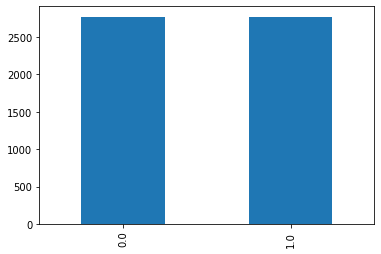

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
pd.Series(y_train).value_counts().plot.bar()

In [ ]:
#Create a Gaussian CLassifier
from sklearn.ensemble import RandomForestClassifier
regressor3=RandomForestClassifier(bootstrap=True,
                                  class_weight=None,
                                  criterion='gini',
                                  max_depth=9,
                                  max_features= 'auto',
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=300,
                                  n_jobs=None,)
regressor3.fit(X_train, y_train)
print ('Done')

KeyboardInterrupt: ignored

In [ ]:
# Menggunakan beberapa teknik klasifikasi untuk membandingkan akurasinya
# Metode Logistic Regression
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Metode K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Metode SVM
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
classifierSVM.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Metode Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Metode Random Forest
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
modelRF = classifierRF.fit(X_train, y_train)

In [ ]:
y_pred_RF2 = regressor3.predict(X_test)

In [ ]:
# Metode XGBoost
import xgboost as xgb # XGBoost stuff
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
modelXG = clf_xgb.fit(X_train, y_train)

In [ ]:
# Save the model
mod_file = 'classification.model'
pickle.dump(modelRF, open(mod_file, 'wb'))

In [ ]:
# Memprediksi hasil Test Set
y_pred_LR = classifierLR.predict(X_test)    # logistic Regression
y_pred_KNN = classifierKNN.predict(X_test)  # K-nearest Neighbors
# y_pred_SVM = classifierSVM.predict(X_test)  # SVM
y_pred_NB = classifierNB.predict(X_test)    # Naive Bayes
y_pred_DT = classifierDT.predict(X_test)    # Decision Tree
y_pred_RF = classifierRF.predict(X_test)    # Random Forest
y_pred_XG = clf_xgb.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_RF2 = confusion_matrix(y_test, y_pred_RF2, labels=[1,0])

In [ ]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
cm_LR = confusion_matrix(y_test, y_pred_LR, labels=[1,0])
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels=[1,0])
# cm_SVM = confusion_matrix(y_test, y_pred_SVM, labels=[1,0])
cm_NB = confusion_matrix(y_test, y_pred_NB, labels=[1,0])
cm_DT = confusion_matrix(y_test, y_pred_DT, labels=[1,0])
cm_RF = confusion_matrix(y_test, y_pred_RF, labels=[1,0])
cm_XG = confusion_matrix(y_test, y_pred_XG, labels=[1,0])

Confusion matrix, without normalization


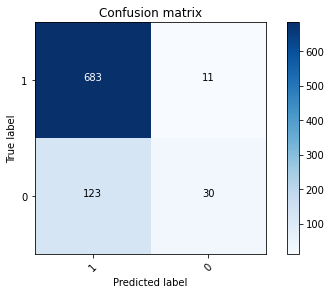

In [ ]:
plot_confusion_matrix(cm_XG, classes=[1,0])

Confusion matrix, without normalization


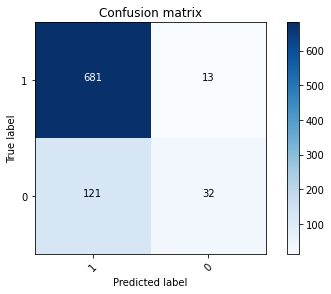

In [ ]:
plot_confusion_matrix(cm_RF, classes=[1,0])

In [ ]:
akurasi_RF2 = ((cm_RF2[0][0]+cm_RF2[1][1])/(cm_RF2[0][0]+cm_RF2[1][1]+cm_RF2[0][1]+cm_RF2[1][0]))*100
print('RF2 ', akurasi_RF2)

RF2  81.93624557260921


In [ ]:
# Menilai akurasi masing-masing metode
akurasi_LR = ((cm_LR[0][0]+cm_LR[1][1])/(cm_LR[0][0]+cm_LR[1][1]+cm_LR[0][1]+cm_LR[1][0]))*100
akurasi_KNN = ((cm_KNN[0][0]+cm_KNN[1][1])/(cm_KNN[0][0]+cm_KNN[1][1]+cm_KNN[0][1]+cm_KNN[1][0]))*100
# akurasi_SVM = ((cm_SVM[0][0]+cm_SVM[1][1])/(cm_SVM[0][0]+cm_SVM[1][1]+cm_SVM[0][1]+cm_SVM[1][0]))*100
akurasi_NB = ((cm_NB[0][0]+cm_NB[1][1])/(cm_NB[0][0]+cm_NB[1][1]+cm_NB[0][1]+cm_NB[1][0]))*100
akurasi_DT = ((cm_DT[0][0]+cm_DT[1][1])/(cm_DT[0][0]+cm_DT[1][1]+cm_DT[0][1]+cm_DT[1][0]))*100
akurasi_RF = ((cm_RF[0][0]+cm_RF[1][1])/(cm_RF[0][0]+cm_RF[1][1]+cm_RF[0][1]+cm_RF[1][0]))*100
akurasi_XG = ((cm_XG[0][0]+cm_XG[1][1])/(cm_XG[0][0]+cm_XG[1][1]+cm_XG[0][1]+cm_XG[1][0]))*100

print('LR ', akurasi_LR)
print('KNN ', akurasi_KNN)
# print('SVM ', akurasi_SVM)
print('NB ', akurasi_NB)
print('DT ', akurasi_DT)
print('RF ', akurasi_RF)
print('XG ', akurasi_XG)

LR  82.52656434474616
KNN  82.0543093270366
NB  75.5608028335301
DT  79.92916174734357
RF  84.17945690672963
XG  84.17945690672963


In [ ]:
akurasi_RF

## DATA UJI PREDICT

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Uji BDC.xlsx to Data Uji BDC.xlsx


In [ ]:
import io
uji = pd.read_excel(io.BytesIO(uploaded['Data Uji BDC.xlsx']),usecols=['judul','narasi'],encoding='ISO-8859-1')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
uji['text'] = uji['judul'] + " " + uji['narasi']
uji = uji.drop(columns = ['judul', 'narasi'])
# df = df.loc[~df['text'].isna()]

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_uji = []
for i in range(0, len(uji)):
    datauji = re.sub('[^a-zA-Z]', ' ', uji['text'][i])
    datauji = datauji.lower()
    datauji = datauji.split()
    ps = PorterStemmer()
    datauji = [ps.stem(word) for word in datauji if not word in inggris]
    datauji = [ps.stem(word) for word in datauji if not word in indo]
    datauji = ' '.join(datauji)
    corpus_uji.append(datauji)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))

# load the model
loaded_model = pickle.load(open('classification.model', 'rb'))

# make a prediction
#print(loaded_model.predict(loaded_vectorizer.transform([utt])))

In [ ]:
X_test = loaded_vectorizer.transform(corpus_uji)

In [ ]:
predRF = loaded_model.predict(X_test)

In [ ]:
predRF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
len(predXG)-sum(predXG)

34

In [ ]:
predXG[468]

0

In [ ]:
X_uji.shape

(470, 19570)

In [ ]:
y_pred_RF2 = regressor3.predict(X_uji) 

In [ ]:
y_pred_RF2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y_pred_RF.shape

(470,)

In [ ]:
ID = pd.read_excel(io.BytesIO(uploaded['Data Uji BDC.xlsx']),usecols=['ID'],encoding='ISO-8859-1')

In [ ]:
ID.head()

,ID
0,238057
1,238158
2,238865
3,248298
4,255176


In [ ]:
predictionn = pd.DataFrame({'ID':ID['ID'], 'prediksi':predRF})

In [ ]:
prediction.tail()

,ID,prediksi
465,206021,1.0
466,219874,1.0
467,222802,1.0
468,226020,0.0
469,232887,1.0


In [ ]:
predictionn['prediksi']=predictionn['prediksi'].astype(int)

In [ ]:
predictionn['prediksi'].value_counts()

1    436
0     34
Name: prediksi, dtype: int64

In [ ]:
from google.colab import  drive

In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
predictionn.to_csv('/drive/My Drive/predictionnRF.csv')